In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Topologia do sistema
$$V = V_{mag} \cup V_{ext} = V_{mag} \cup V_{gap} \cup V_{leak}$$
$$V_{ext} =  V_{gap} \cup V_{leak}$$
$$V_{gap} \subseteq V_{ext} $$

# Energia magnética

$$ w = \textbf{B}\cdot\textbf{H} $$
$$ W = \int w\cdot dv = \int\textbf{B}\cdot\textbf{H} dv $$


$$ W_{mag} =  -\int_{V_{mag}}\textbf{B}\cdot\textbf{H} dv = \int_{V_{ext}}\textbf{B}\cdot\textbf{H} dv = W_{ext} $$

# Eficiências

## Eficiência Magnética:
Razão entre energia 'gerada' pelo ímã em seu exterior e a energia máxima que este pode 'gerar'. Segundo Jensen & Abel (1996), se $W_{mag} = W_{mag}^{*}$ (se o ímã está operando em seu ponto de operação ótimo), então $\textbf{B} = \frac{\textbf{B}_{rem}}{2}$ e então $W_{mag}^{*} = \frac{\textbf{B}_{rem}^2}{4\mu}$.
Definimos então
$$ \eta_m \equiv 4M \equiv \frac{W_{mag}}{W_{mag}^*} = 4\frac{\int_{V_{ext}}\mu_0|\mathbf{B}\cdot\mathbf{H}|dV}{\int_{V_{mag}}|\mathbf{B_{rem}}|^2dV} = \frac{\int_{V_{ext}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{ext}}(\mathbf{B}\cdot \mathbf{H})_{max} dV}$$

## Eficiência estrutural:
Razão entre a energia magnética no entreferro e a energia total 'gerada' pelo ímã.
$$ \eta_p \equiv \frac{W_{gap}}{W_{ext}} =  \frac{\int_{V_{gap}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{ext}}\mathbf{B}\cdot \mathbf{H} dV} = 1 - \frac{\int_{V_{leak}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{ext}}\mathbf{B}\cdot \mathbf{H} dV}$$

## Eficiência Geral
Razão entre a energia magnética no $\textit{gap}$ e a energia máxima que o ímã pode gerar em seu exterior. 
$$
    \eta = \eta_m \cdot \eta_{p} = \frac{W_{gap}}{W_{gap}^{*}} =  4\frac{\int_{V_{gap}}\mu_0|\mathbf{B}\cdot\mathbf{H}|dV}{\int_{V_{mag}}|\mathbf{B_{rem}}|^2dV} = \frac{\int_{V_{gap}}\mathbf{B}\cdot \mathbf{H} dV}{\int_{V_{gap}}(\mathbf{B}\cdot \mathbf{H})_{max} dV}
$$


# Objetivo:
Para mesmo volume de ímã e entreferro, analisar impacto das geometrias de gap e ímã nas eficiências. Como temos volume fixo e topologia fixa (retangular), temos apenas 2 variáveis a analisar: a altura do gap h_gap e a largura do ímã w_mag.

A | B
- | - 
![alt](image3.png) | ![alt](image4.png)


In [2]:
 ef = np.loadtxt('EFICIEINCIAS.txt',skiprows=8)

In [3]:
i=0
ef_list = []


for w_mag in np.arange(0.05,0.9,0.02):
    for h_gap in np.arange(0.015,0.09,0.002):
        ef_tuple = [w_mag,h_gap,ef[i],ef[i+1],ef[i]*ef[i+1]]
        ef_list.append(ef_tuple)
        i+=2

In [4]:
ef_array = np.array(ef_list)
ef_array = np.transpose(ef_array)
ef_array = np.round(ef_array,7)

In [5]:
d = {'w_mag':ef_array[0],'h_gap':ef_array[1],'Magnetic Efficiency':ef_array[2],'Strutural Efficiency':ef_array[3],'General Efficiency':ef_array[4]}
df = pd.DataFrame(d)

# Eficiência magnética
Como podemos observar, para qualquer geometria conseguimos atingir um ponto de operação ótimo.

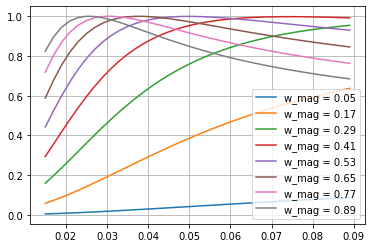

In [6]:
for w in np.round(np.arange(0.05,0.9,0.12),2):
    h_gap = np.asarray(df[df['w_mag']==w]['h_gap'])
    mag_ef = np.asarray(df[df['w_mag']==w]['Magnetic Efficiency'])
    plt.plot(h_gap,mag_ef,label = 'w_mag = {}'.format(w))
plt.legend()
plt.grid()
plt.show()

# Eficiência Estrutural
Como esperado, um gap 'fino' possui alta eficiÊncia estrutural, devido ao menor espraiamento de campo. Ainda, ímãs grossos possuem melhor eficiência, devido À menor dispersão. 


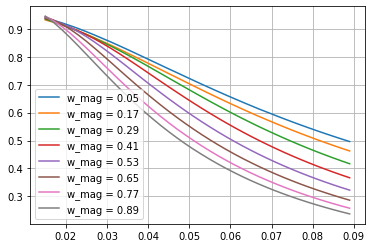

In [7]:
for w in np.round(np.arange(0.05,0.9,0.12),2):
    h_gap = np.asarray(df[df['w_mag']==w]['h_gap'])
    mag_ef = np.asarray(df[df['w_mag']==w]['Strutural Efficiency'])
    plt.plot(h_gap,mag_ef,label = 'w_mag = {}'.format(w))
plt.legend()
plt.grid()
plt.show()

# Eficiência geral

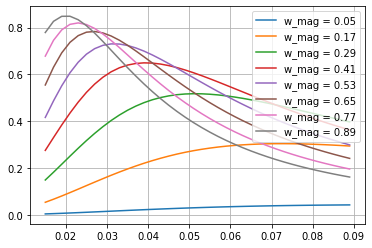

In [8]:
for w in np.round(np.arange(0.05,0.9,0.12),2):
    h_gap = np.asarray(df[df['w_mag']==w]['h_gap'])
    mag_ef = np.asarray(df[df['w_mag']==w]['General Efficiency'])
    plt.plot(h_gap,mag_ef,label = 'w_mag = {}'.format(w))
plt.legend()
plt.grid()
plt.show()

# Otimização topológica do ferro
A otimização do ferro não tem impacto considerável na eficiência magnética. Porém, pode ter bastante impacto na eficiência estrutural.

![""](image1.png)
h_gap = 70, w_mag = 0.3
$\eta_m = 0.96$, $\eta_p = 0.75$

# Exemplo
Para mesmas massas do ímã Halbach Polo, definimos primeiramente algumas restrições de tamanho. A partir disso, podemos chegar nas melhores geometrias possíveis.

![""](image2.png)

h_gap = 30, w_mag = 0.53
$\eta_p = 0.88$

In [10]:
df2 = df.copy()

In [11]:
df2['w_gap'] = 0.0064289*(df['h_gap']**(-1))

In [13]:
df2['dif']=abs(df2['w_gap']-df2['w_mag'])

In [28]:
(df2.sort_values('Magnetic Efficiency'))[df2['dif']<0.2]

C:\Users\Luis Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,w_mag,h_gap,Magnetic Efficiency,Strutural Efficiency,General Efficiency,w_gap,dif
6,0.05,0.027,0.015359,0.878051,0.013486,0.238107,0.188107
7,0.05,0.029,0.017412,0.865412,0.015069,0.221686,0.171686
8,0.05,0.031,0.019551,0.852854,0.016674,0.207384,0.157384
9,0.05,0.033,0.021754,0.839578,0.018264,0.194815,0.144815
10,0.05,0.035,0.024017,0.826111,0.019841,0.183683,0.133683
...,...,...,...,...,...,...,...
451,0.27,0.081,0.903145,0.468306,0.422948,0.079369,0.190631
452,0.27,0.083,0.909584,0.457066,0.415739,0.077457,0.192543
453,0.27,0.085,0.915573,0.446151,0.408484,0.075634,0.194366
454,0.27,0.087,0.921138,0.435591,0.401239,0.073895,0.196105
